In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
out_deg = h5py.File('out_deg.h5', 'r')
print([key for key in out_deg.keys()])
# infec_frac = h5py.File('infec_frac.h5', 'r')
# print([key for key in infec_frac.keys()])
# connec_comps = h5py.File('connec_comps.h5', 'r')
# pd.read_hdf('connec_comps.h5','sim_70_p_rew_0.01_start_10_dq_0.1')

['sim_100_p_rew_0.318_start_10_dq_0.5', 'sim_100_p_rew_0.318_start_10_dq_2', 'sim_100_p_rew_0.318_start_1_dq_0.5', 'sim_100_p_rew_0.318_start_1_dq_2', 'sim_100_p_rew_3.18_start_10_dq_0.5', 'sim_100_p_rew_3.18_start_10_dq_2', 'sim_100_p_rew_3.18_start_1_dq_0.5', 'sim_100_p_rew_3.18_start_1_dq_2', 'sim_100_p_rew_31.8_start_10_dq_0.5', 'sim_100_p_rew_31.8_start_10_dq_2', 'sim_100_p_rew_31.8_start_1_dq_0.5', 'sim_100_p_rew_31.8_start_1_dq_2', 'sim_100_p_rew_318_start_10_dq_0.5', 'sim_100_p_rew_318_start_10_dq_2', 'sim_100_p_rew_318_start_1_dq_0.5', 'sim_100_p_rew_318_start_1_dq_2', 'sim_101_p_rew_0.318_start_10_dq_0.5', 'sim_101_p_rew_0.318_start_10_dq_2', 'sim_101_p_rew_0.318_start_1_dq_0.5', 'sim_101_p_rew_0.318_start_1_dq_2', 'sim_101_p_rew_3.18_start_10_dq_0.5', 'sim_101_p_rew_3.18_start_10_dq_2', 'sim_101_p_rew_3.18_start_1_dq_0.5', 'sim_101_p_rew_3.18_start_1_dq_2', 'sim_101_p_rew_31.8_start_10_dq_0.5', 'sim_101_p_rew_31.8_start_10_dq_2', 'sim_101_p_rew_31.8_start_1_dq_0.5', 'sim_101

In [2]:
N = 100
rew_r = 10
density = 1/N

In [3]:
def obtain_deg_sampling_average(key_half,file) :
    sampling = []
    for j in range(74,70+100) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        bins_number = 101
        count_deg = np.zeros((bins_number,df.shape[1]))
        for i in range(df.shape[1]) :
            count, division_deg = np.histogram(df.loc[:,i], bins = bins_number,range =(0,101))
            count_deg[:,i] = count
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average    

## Count out degree :
### Row numbers are out degree values.  Columns are time steps. Each element is the count 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


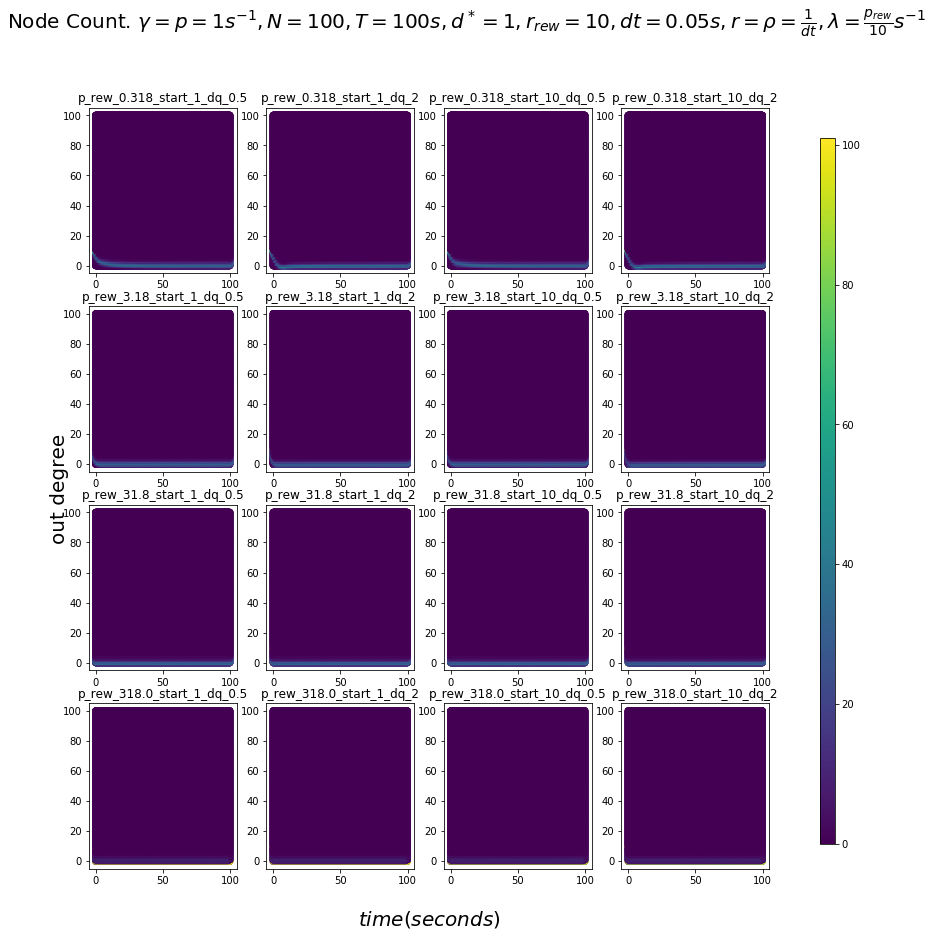

In [5]:
sampling_average_list_out = []
file = 'out_deg.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [round(vals,3),round(10*vals,3),round(100*vals,3),round(1000*vals,3)]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        if a == 3 :
            key_half = '_p_rew_318'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        sampling_average = obtain_deg_sampling_average(key_half,file)
        sampling_average_list_out.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.scatter(X,Y,c= sampling_average,vmin=0, vmax=101)
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Node Count. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,r_{rew}=10,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'out degree', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.savefig("out_deg.png", format="png")

0
80
90
100
110
120
130
140
150
160
1
80
90
100
110
120
130
140
150
160
2
80
90
100
110
120
130
140
150
160
3
80
90
100
110
120
130
140
150
160
4
80
90
100
110
120
130
140
150
160
5
80
90
100
110
120
130
140
150
160
6
80
90
100
110
120
130
140
150
160
7
80
90
100
110
120
130
140
150
160


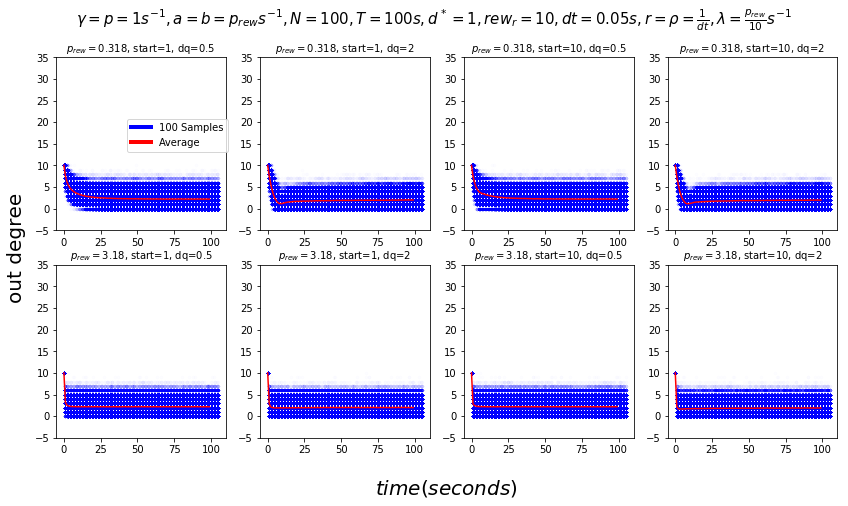

In [4]:
sampling_average_list_out = []
file = 'out_deg.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [round(vals,3),round(10*vals,3),round(100*vals,3),round(1000*vals,3)]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14,7))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        appended_data = []
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = r'$p_{rew}=$'+str(p_rew_vals[a])+', start='+str(start_vals[b])+', dq='+str(dose_quantity_vals[d])
        if a == 3 :
            key_half = '_p_rew_318'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title,fontsize=10)
        ax[m, n].set_ylim([-5,35])
#         ax[m, n].set_xlim([-0.1,20])
#         sampling_average = obtain_deg_sampling_average(key_half,file)
#         sampling_average_list_out.append(sampling_average)
        for j in range(74,70+100) :
            if j%10 == 0 :
                print(j)
            key = 'sim_'+str(j)+key_half
            df = pd.read_hdf(file,key)
            for i in range(100) :
                im = df.iloc[i,::19].plot(use_index = False,alpha=0.008,ax=ax[m, n],legend=False,color='blue',style = '.')
            y = df[df.columns[::20]].mean().to_frame().T
#             im = col.plot(np.arange(0,100),y.iloc[0],color='red')
            appended_data.append(y)
    
        appended_data = pd.concat(appended_data, axis=0).groupby(level=0).mean().T
        im = col.plot(np.arange(0,100),appended_data,color='red')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\gamma=p=1s^{-1},a=b=p_{rew} s^{-1},N=100,T=100s,d^*=1,rew_{r}=10,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 15)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'out degree', fontsize = 20, labelpad=30)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),]

fig.legend(custom_lines, ['100 Samples', 'Average'],loc=(0.15,0.7))
plt.savefig("out_deg_forep.png", format="png")

In [ ]:
def obtain_deg_sampling_average(key_half,file) :
    sampling = []
    for j in range(74,70+100) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        bins_number = 101
        count_deg = np.zeros((bins_number,df.shape[1]))
        for i in range(df.shape[1]) :
            count, division_deg = np.histogram(df.loc[:,i], bins = bins_number,range =(0,101))
            count_deg[:,i] = count
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average    

0
80
90
100
110
120
130
140
150
160
1
80
90
100
110
120
130
140
150
160
2
80
90
100
110
120
130
140
150
160
3
80
90
100
110
120
130
140
150
160
4
80
90
100
110
120
130
140
150
160
5
80
90
100
110
120
130
140
150
160
6
80
90
100
110
120
130
140
150
160
7
80
90
100
110
120
130
140
150
160


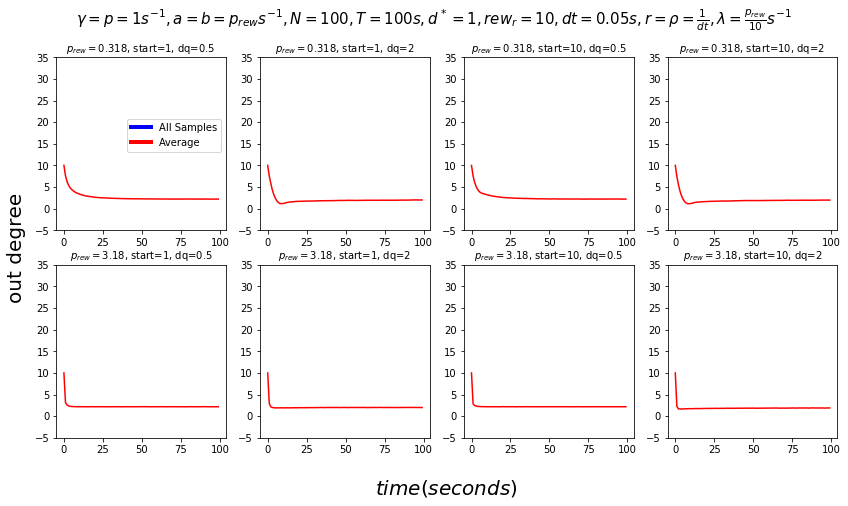

In [198]:
sampling_average_list_out = []
file = 'out_deg.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)


vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [round(vals,3),round(10*vals,3),round(100*vals,3),round(1000*vals,3)]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14,7))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        appended_data = []
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = r'$p_{rew}=$'+str(p_rew_vals[a])+', start='+str(start_vals[b])+', dq='+str(dose_quantity_vals[d])
        if a == 3 :
            key_half = '_p_rew_318'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title,fontsize=10)
        ax[m, n].set_ylim([-5,35])
#         ax[m, n].set_xlim([-0.1,20])
#         sampling_average = obtain_deg_sampling_average(key_half,file)
#         sampling_average_list_out.append(sampling_average)
        for j in range(74,70+100) :
            if j%10 == 0 :
                print(j)
            key = 'sim_'+str(j)+key_half
            df = pd.read_hdf(file,key)
#             im = df[df.columns[::20]].plot(alpha=0.01,ax=ax[m, n],legend=False,color='blue',style = '.')
            y = df[df.columns[::20]].mean().to_frame().T
            appended_data.append(y)
    
        appended_data = pd.concat(appended_data, axis=0).groupby(level=0).mean().T
#         y = appended_data[appended_data.columns[::20]].mean().to_frame().T
        im = col.plot(np.arange(0,100),appended_data,color='red')
#         im = col.scatter(X,Y,c= sampling_average,vmin=0, vmax=101,cmap='tab10')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\gamma=p=1s^{-1},a=b=p_{rew} s^{-1},N=100,T=100s,d^*=1,rew_{r}=10,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 15)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'out degree', fontsize = 20, labelpad=30)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),]

fig.legend(custom_lines, ['All Samples', 'Average'],loc=(0.15,0.7))
plt.savefig("out_deg_forep.png", format="png")

In [183]:
appended_data

,0,20,40,60,80,100,120,140,160,180,...,1800,1820,1840,1860,1880,1900,1920,1940,1960,1980
0,10.0,7.6025,6.267188,5.40125,4.828958,4.419479,4.108333,3.851667,3.65375,3.495937,...,2.207188,2.218333,2.212708,2.207083,2.20375,2.200625,2.20875,2.202708,2.195833,2.195937


In [195]:
appended_data = []
v1 = pd.DataFrame([['ind1', 1, 2, 3], ['ind2', 4, 5, 6]], columns=['id', 'c1', 'c2', 'c3']).set_index('id')
v2 = pd.DataFrame([['ind1', 2, 3, 4], ['ind2', 6, 1, 2]], columns=['id', 'c1', 'c2', 'c3']).set_index('id')
v3 = pd.DataFrame([['ind1', 1, 2, 1], ['ind2', 1, 1, 3]], columns=['id', 'c1', 'c2', 'c3']).set_index('id')
appended_data.append(v1)
appended_data.append(v2)
appended_data.append(v3)
print(v1)
print(v2)
print(v3)
appended_data = pd.concat(appended_data, axis=0)
blah = appended_data.groupby(level=0).mean()
print(appended_data)
print(blah)

      c1  c2  c3
id              
ind1   1   2   3
ind2   4   5   6
      c1  c2  c3
id              
ind1   2   3   4
ind2   6   1   2
      c1  c2  c3
id              
ind1   1   2   1
ind2   1   1   3
      c1  c2  c3
id              
ind1   1   2   3
ind2   4   5   6
ind1   2   3   4
ind2   6   1   2
ind1   1   2   1
ind2   1   1   3
            c1        c2        c3
id                                
ind1  1.333333  2.333333  2.666667
ind2  3.666667  2.333333  3.666667


In [187]:
appended_data

[      c1  c2  c3
 id              
 ind1   1   2   3
 ind2   4   5   6,       c1  c2  c3
 id              
 ind1   2   3   4
 ind2   6   1   2,       c1  c2  c3
 id              
 ind1   1   2   1
 ind2   1   1   3]

## Count in degree :
### Row numbers are in degree values.  Columns are time steps. Each element is the count 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


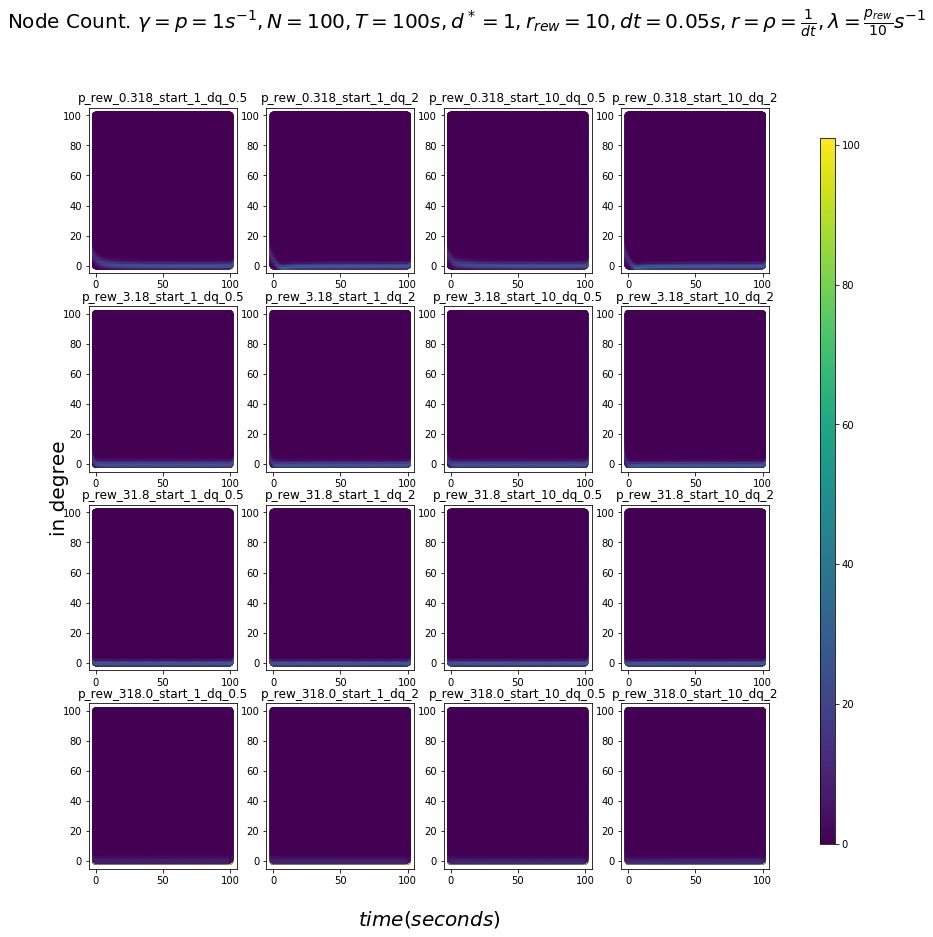

In [6]:
sampling_average_list_in = []
file = 'in_deg.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [round(vals,3),round(10*vals,3),round(100*vals,3),round(1000*vals,3)]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        if a == 3 :
            key_half = '_p_rew_318'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        sampling_average = obtain_deg_sampling_average(key_half,file)
        sampling_average_list_in.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.scatter(X,Y,c= sampling_average,vmin=0, vmax=101)
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Node Count. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,r_{rew}=10,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'in degree', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.savefig("in_deg.png", format="png")

## Infected Fraction

In [152]:
def obtain_infec_sampling_average(key_half,file) :
    sampling = []
    for j in range(74,70+100) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average

In [26]:
def obtain_infec_sampling_colourmap(key_half,file) :
    frames = []
    sampling = []
    for j in range(74,80) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        result = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        frames.append(result)
    df = pd.concat(frames)

    bins_number = 11
    count_deg = np.zeros((bins_number,df.shape[1]))
    for i in range(df.shape[1]) :
        count, division_deg = np.histogram(df.loc[:,i], bins = bins_number,range =(0,1.01))
#         count, division_deg = np.histogram(df.loc[:,i], bins = bins_number)
        count_deg[:,i] = count
    sampling.append(count_deg)

    sampling_average = 999*np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average,df

#### Infected Fraction Colour map

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


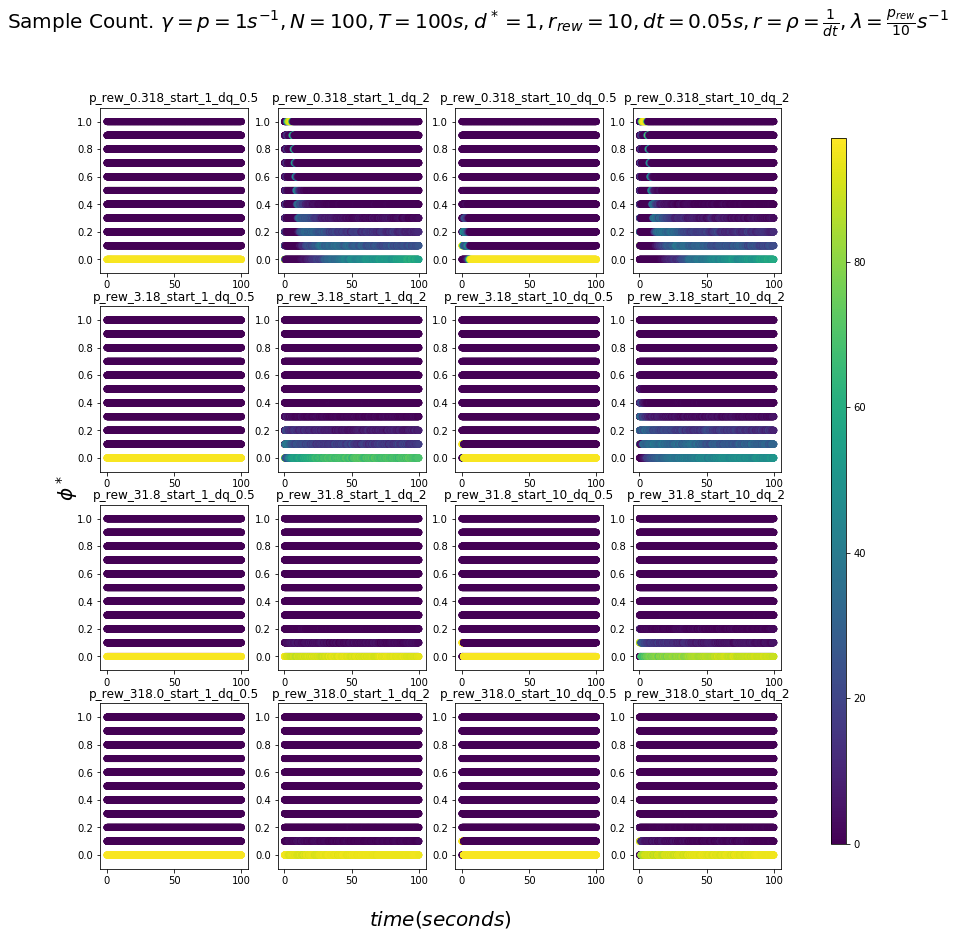

In [9]:
sampling_average_list_infected_cmap = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,1.01,0.1)
X,Y = np.meshgrid(x,y)

vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [round(vals,3),round(10*vals,3),round(100*vals,3),round(1000*vals,3)]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        if a == 3 :
            key_half = '_p_rew_318'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average,df = obtain_infec_sampling_colourmap(key_half,file)
        sampling_average_list_infected_cmap.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
#         im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-')
        im = col.scatter(X,Y,c= sampling_average,vmin=0, vmax=101-4)
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Sample Count. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,r_{rew}=10,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.savefig("infec_frac_cmap.png", format="png")

#### Infected Fraction Sampling Average

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


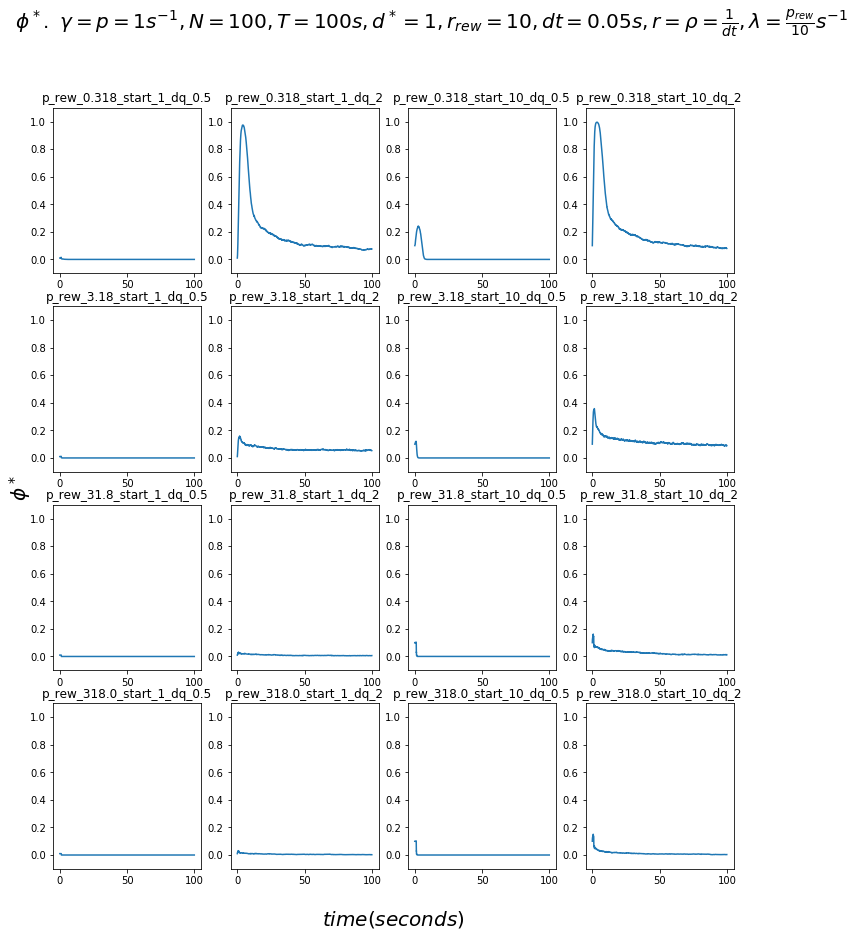

In [10]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [round(vals,3),round(10*vals,3),round(100*vals,3),round(1000*vals,3)]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        if a == 3 :
            key_half = '_p_rew_318'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        sampling_average_list_infected.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\phi^*.$ $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,r_{rew}=10,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("infec_frac.svg", format="svg")

0
88
1
77
2
86
3
77
4
126
5
84
6
124
7
168
8
168
9
119
10
122
11
97
12
101
13
137
14
96
15
130


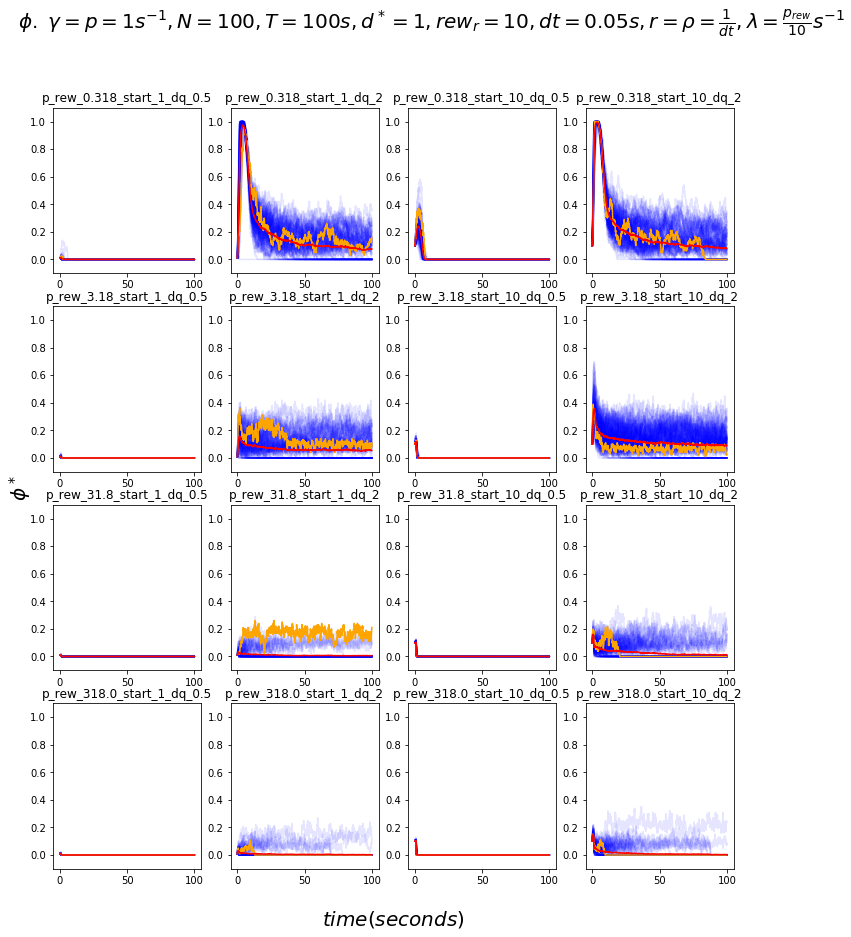

In [159]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [round(vals,3),round(10*vals,3),round(100*vals,3),round(1000*vals,3)]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        if a == 3 :
            key_half = '_p_rew_318'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        for i in range(74,70+100) :
            key = 'sim_'+str(i)+key_half
            df = pd.read_hdf(file,key)
            count_deg = df.values
            im = col.plot(x.flatten(),count_deg.flatten(),color='blue',linestyle = '-',alpha = 0.1)
        i = np.random.randint(74,70+100)
        print(i)
        key = 'sim_'+str(i)+key_half
        df = pd.read_hdf(file,key)
        count_deg = df.values
        im = col.plot(x.flatten(),count_deg.flatten(),color='orange',linestyle = '-')
        im = col.plot(x.flatten(),sampling_average.flatten(),color='red',linestyle = '-')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\phi.$ $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,rew_{r}=10,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("infec_frac_all.png", format="png")

0
145
1
95
2
107
3
156
4
162
5
126
6
144
7
121


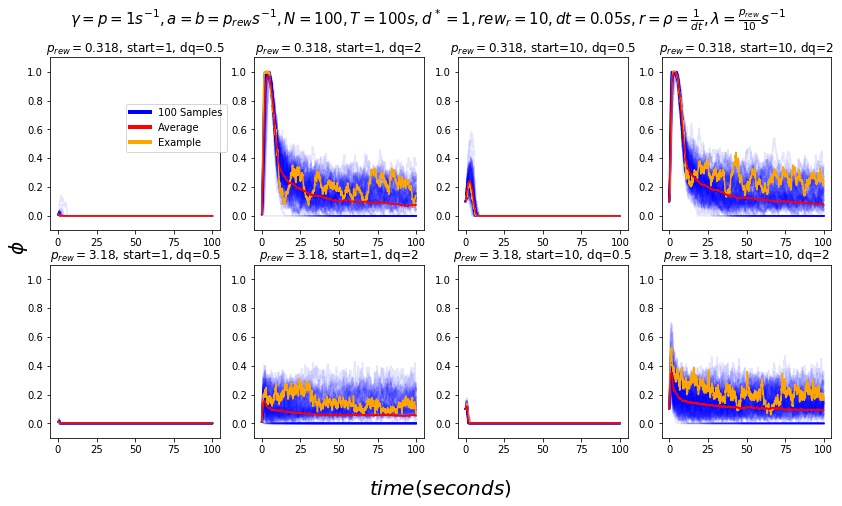

In [160]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [round(vals,3),round(10*vals,3),round(100*vals,3),round(1000*vals,3)]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14,7))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = r'$p_{rew}=$'+str(p_rew_vals[a])+', start='+str(start_vals[b])+', dq='+str(dose_quantity_vals[d])
        if a == 3 :
            key_half = '_p_rew_318'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        for i in range(74,70+100) :
            key = 'sim_'+str(i)+key_half
            df = pd.read_hdf(file,key)
            count_deg = df.values
            im = col.plot(x.flatten(),count_deg.flatten(),color='blue',linestyle = '-',alpha = 0.1)
        i = np.random.randint(74,70+100)
        print(i)
        key = 'sim_'+str(i)+key_half
        df = pd.read_hdf(file,key)
        count_deg = df.values
        im = col.plot(x.flatten(),count_deg.flatten(),color='orange',linestyle = '-')
        im = col.plot(x.flatten(),sampling_average.flatten(),color='red',linestyle = '-')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\gamma=p=1s^{-1},a=b=p_{rew} s^{-1},N=100,T=100s,d^*=1,rew_{r}=10,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 15)
nax.set_ylabel(r'$\phi$', fontsize = 20, labelpad=20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
# fig.subplots_adjust(right=0.8)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]

fig.legend(custom_lines, ['100 Samples', 'Average','Example'],loc=(0.15,0.7))

plt.savefig("infec_frac_all_forrep.png", format="png")

## Connected Components

In [11]:
def obtain_connected_comps_sampling_average(key_half,file) :
    sampling = []
    for j in range(74,70+100) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average

### Connected Components average

0


NameError: name 'obtain_connected_comps_sampling_average' is not defined

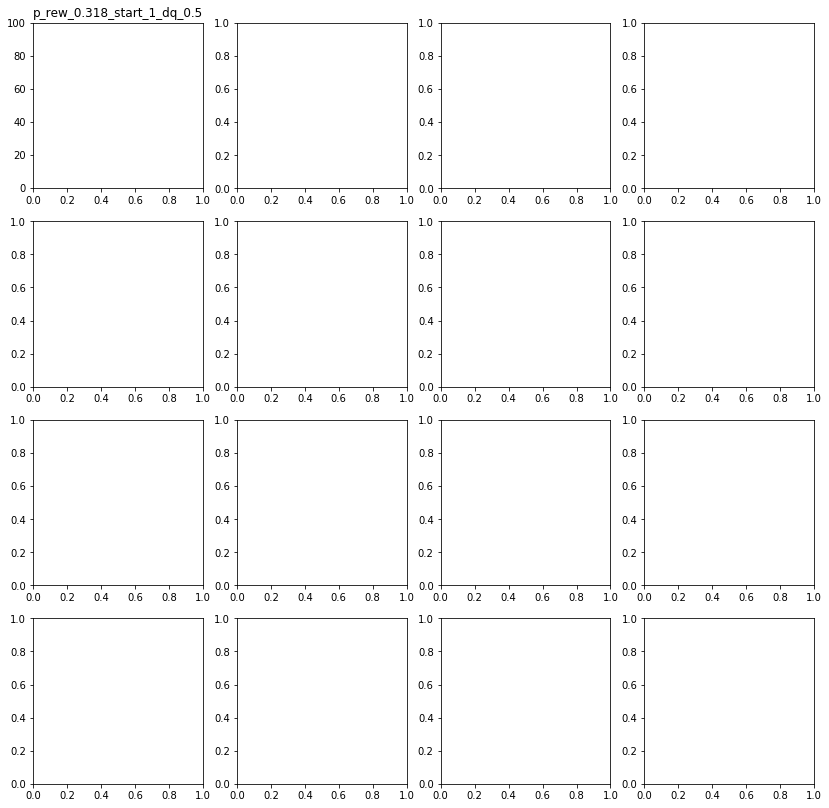

In [51]:
sampling_average_list_cc_av = []
file = 'connec_comps.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [round(vals,3),round(10*vals,3),round(100*vals,3),round(1000*vals,3)]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        if a == 3 :
            key_half = '_p_rew_318'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,100.1])
#         ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_connected_comps_sampling_average(key_half,file)
        sampling_average_list_cc_av.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Connected. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,r_{rew}=10,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'Number', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("connec_comps_av.svg", format="svg")